## **Real Dataset + Multi-Class Logistic Regression (Softmax)**

**We'll use the Iris dataset, which has 3 classes:**


*   Setosa (0)
*   Versicolor (1)
*   Virginica (2)

# **Load Dataset**

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load iris
iris = datasets.load_iris()
X = iris.data       # (150, 4)
y = iris.target     # (150,)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))  # (150, 3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# **Softmax Function**

In [5]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# **Multi-Class Cross-Entropy Loss**

In [8]:
def compute_loss(y_true, y_pred):
    eps = 1e-8
    return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))

# **Initialize Weights**

In [9]:
def initialize_weights(n_features, n_classes):
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))
    return W, b

# **Train with Gradient Descent**

In [10]:
def train(X, y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    W, b = initialize_weights(n_features, n_classes)
    losses = []

    for i in range(epochs):
        # Forward pass
        logits = np.dot(X, W) + b  # (n_samples, n_classes)
        y_pred = softmax(logits)

        # Loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        # Gradients
        error = y_pred - y                      # (n_samples, n_classes)
        dW = np.dot(X.T, error) / n_samples     # (n_features, n_classes)
        db = np.sum(error, axis=0, keepdims=True) / n_samples  # (1, n_classes)

        # Update
        W -= lr * dW
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

    return W, b, losses

# **Predict & Accuracy**

In [11]:
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Train model
W, b, losses = train(X_train, y_train)

# Predict
y_pred_test = predict(X_test, W, b)
y_true_test = np.argmax(y_test, axis=1)

# Accuracy
acc = np.mean(y_pred_test == y_true_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

Epoch 0, Loss: 1.0986
Epoch 100, Loss: 0.3398
Epoch 200, Loss: 0.2702
Epoch 300, Loss: 0.2290
Epoch 400, Loss: 0.2009
Epoch 500, Loss: 0.1805
Epoch 600, Loss: 0.1651
Epoch 700, Loss: 0.1530
Epoch 800, Loss: 0.1432
Epoch 900, Loss: 0.1352
Test Accuracy: 100.00%


# **Plot Loss Curve**

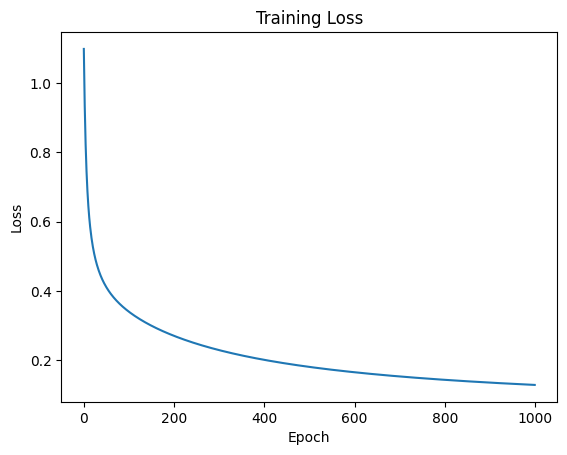

In [12]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# **Visualize 2D Decision Boundary**

Epoch 0, Loss: 1.0986
Epoch 100, Loss: 0.3657
Epoch 200, Loss: 0.3110
Epoch 300, Loss: 0.2789
Epoch 400, Loss: 0.2569
Epoch 500, Loss: 0.2411
Epoch 600, Loss: 0.2291
Epoch 700, Loss: 0.2198
Epoch 800, Loss: 0.2125
Epoch 900, Loss: 0.2065


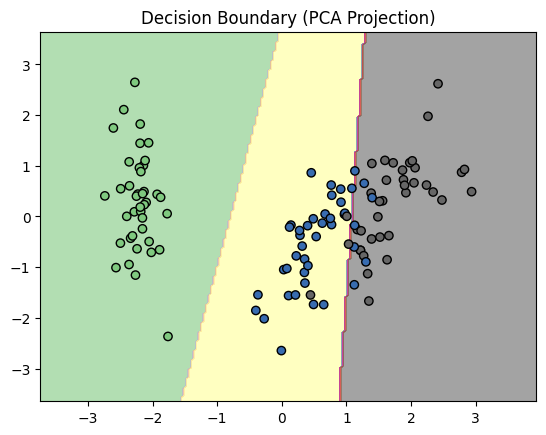

In [14]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train)
W_vis, b_vis, _ = train(X_vis, y_train)

# Plot decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid, W_vis, b_vis)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Accent', alpha=0.6)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=np.argmax(y_train, axis=1), cmap='Accent', edgecolors='k')
plt.title("Decision Boundary (PCA Projection)")
plt.show()